# Ridge & Lasso Regression :- Super Store Sales Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
## Loading Data 
df = pd.read_csv("train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
## Let Us Check for missing values 

df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

We can there is a missing values in the Postal Cade

In [4]:
## Let us check the Shape of the data

df.shape

(9800, 18)

We got to Know that we have 18 Columns & 9800 row

In [5]:
## Check the data types
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
## shows only the numerical values
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


## EDA

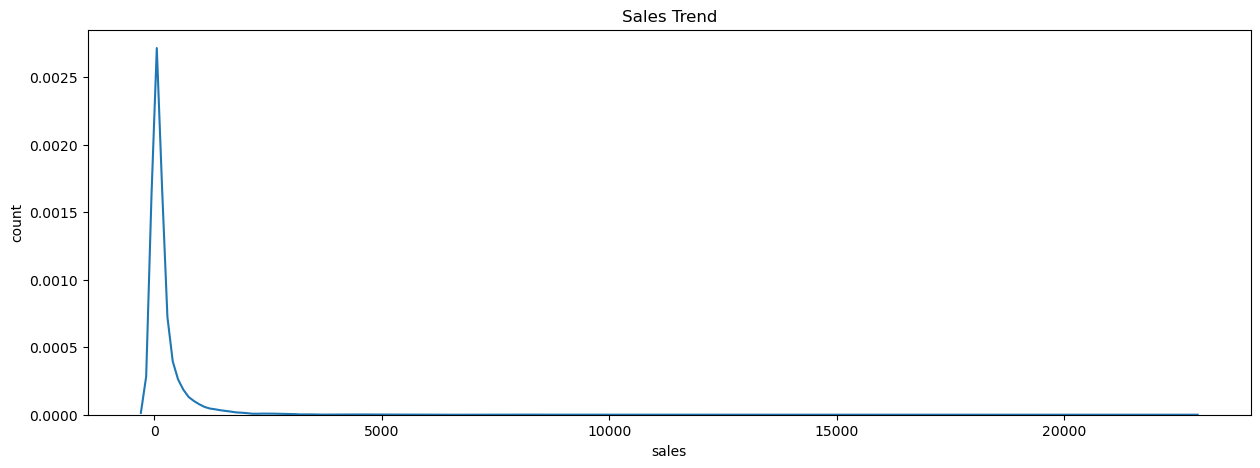

In [8]:
## Let us plot some Target data
plt.figure(figsize=(15,5))
sns.kdeplot(df['Sales'])
plt.title("Sales Trend")
plt.xlabel('sales')
plt.ylabel('count')
plt.show()

In [9]:
## Average of sales in mean & median

df['Sales'].mean(), df['Sales'].median()

(np.float64(230.7690594591837), 54.489999999999995)

### We can see the difference average of the sales is higher in mean the modian

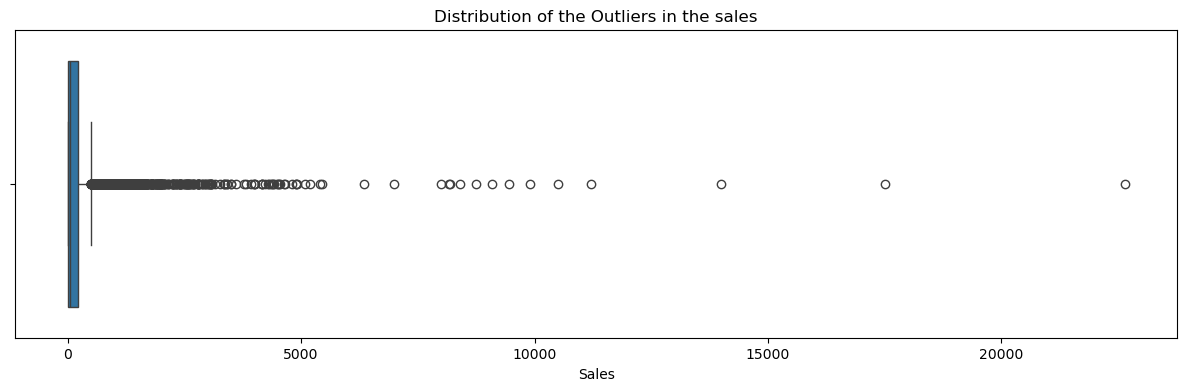

In [10]:
## let us check the IQR using box plot 
plt.figure(figsize=(15,4))
sns.boxplot(x =df['Sales'])
plt.title("Distribution of the Outliers in the sales")
plt.show()

## Let us see the Five number summary

In [11]:
minimum  =  df['Sales'].min()
maximum = df['Sales'].max()
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
median = df['Sales'].median()

print(f"Minimum Sales:{minimum}")
print(f"Q1: {Q1}")
print(f"Median: {median}")
print(f"Q3 : {Q3}")
print(f"Maximum: {maximum}")

Minimum Sales:0.444
Q1: 17.248
Median: 54.489999999999995
Q3 : 210.60500000000002
Maximum: 22638.48


In [12]:
## Interquartile range

IQR = Q3 - Q1 
IQR

np.float64(193.35700000000003)

### To check the Total number of the Outliers 

In [13]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]

print("Number of outliers:", len(outliers))

Number of outliers: 1145


In [14]:
## It's Right Side Skewed 

df['Sales'].skew()

np.float64(12.983482865034619)

In [15]:
## Log Transformation (Reduce Skeness)

Sales_log = np.log1p(df['Sales'])

In [16]:

Sales_log.skew()

np.float64(0.2810852775024328)

### The skewness value of 0.28 indicates that the distribution is approximately symmetric with a slight positive skew, and therefore no transformation is necessary.

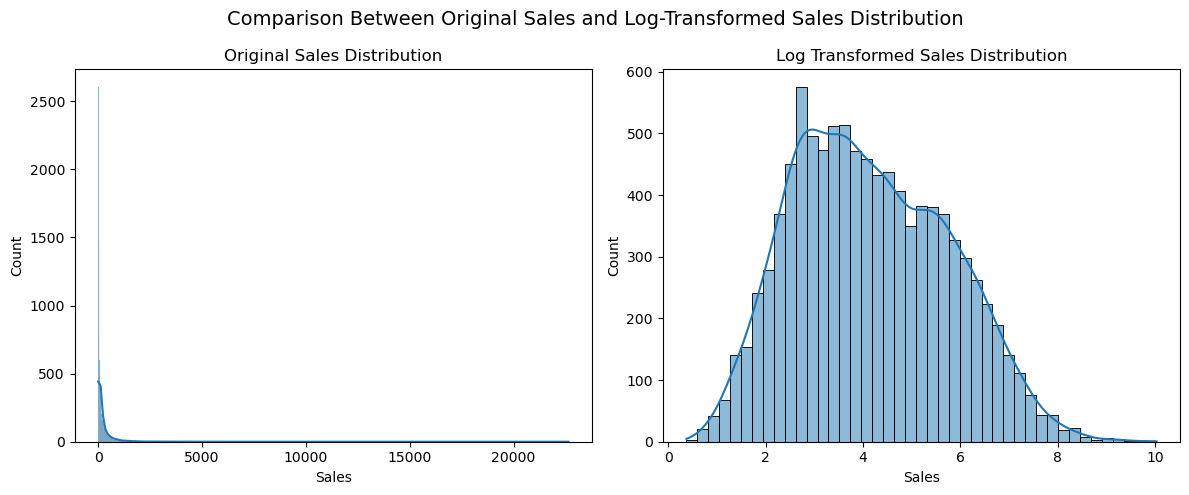

In [17]:

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['Sales'], kde=True)
plt.title("Original Sales Distribution")

plt.subplot(1,2,2)
sns.histplot(Sales_log, kde=True)
plt.title("Log Transformed Sales Distribution")

# Main comparison title
plt.suptitle("Comparison Between Original Sales and Log-Transformed Sales Distribution",
             fontsize=14)

plt.tight_layout()
plt.show()


In [18]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

## ANOVA test

Hypothesis

H0: Mean sales are the same across regions

H1: Mean sales differ across regions

In [19]:
from scipy.stats import f_oneway

east  = df[df['Region']=="East"]['Sales']
west  = df[df['Region']=="West"]['Sales']
south = df[df['Region']=="South"]['Sales']
central = df[df['Region']=="Central"]['Sales']

print(f"Value : {f_oneway(east, west, south, central)}")


Value : F_onewayResult(statistic=np.float64(0.8974322307844987), pvalue=np.float64(0.44157758889756793))


In [20]:
consumer = df[df['Segment']=="Consumer"]['Sales']
corporate = df[df['Segment']=="Corporate"]['Sales']
home = df[df['Segment']=="Home Office"]['Sales']

f_oneway(consumer, corporate, home)


F_onewayResult(statistic=np.float64(0.5874032714436911), pvalue=np.float64(0.5557881652680301))

In [21]:
m1 = df[df['Ship Mode']=="First Class"]['Sales']
m2 = df[df['Ship Mode']=="Second Class"]['Sales']
m3 = df[df['Ship Mode']=="Standard Class"]['Sales']
m4 = df[df['Ship Mode']=="Same Day"]['Sales']

f_oneway(m1, m2, m3, m4)


F_onewayResult(statistic=np.float64(0.07437771541761885), pvalue=np.float64(0.9737696598907598))

In [22]:
tech = df[df['Category']=="Technology"]['Sales']
furn = df[df['Category']=="Furniture"]['Sales']
office = df[df['Category']=="Office Supplies"]['Sales']

f_oneway(tech, furn, office)


F_onewayResult(statistic=np.float64(262.1646591215713), pvalue=np.float64(1.2178144965918443e-111))

### “Among the four ANOVA tests performed, only one factor shows a statistically significant difference between groups (p < 0.05), while the remaining factors do not significantly affect the mean sales.”

In [23]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [24]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"],dayfirst=True)
df["Order Date"]= pd.to_datetime(df['Order Date'],dayfirst=True)

In [25]:
df["Ship_day"] = pd.to_datetime(df['Ship Date']).dt.day
df["Ship_year"] = pd.to_datetime(df['Ship Date']).dt.year
df["Ship_month"] = pd.to_datetime(df['Ship Date']).dt.month

In [26]:
df["order_day"] = pd.to_datetime(df['Order Date']).dt.day
df["order_month"] = pd.to_datetime(df['Order Date']).dt.month
df["order_year"] = pd.to_datetime(df['Order Date']).dt.year

In [27]:
df["order_day_of_week"] = pd.to_datetime(df['Order Date']).dt.day_of_week
df["Ship_day_of_week"] = pd.to_datetime(df['Ship Date']).dt.day_of_week

In [28]:
df.head().T

,0,1,2,3,4
Row ID,1,2,3,4,5
Order ID,CA-2017-152156,CA-2017-152156,CA-2017-138688,US-2016-108966,US-2016-108966
Order Date,2017-11-08 00:00:00,2017-11-08 00:00:00,2017-06-12 00:00:00,2016-10-11 00:00:00,2016-10-11 00:00:00
Ship Date,2017-11-11 00:00:00,2017-11-11 00:00:00,2017-06-16 00:00:00,2016-10-18 00:00:00,2016-10-18 00:00:00
Ship Mode,Second Class,Second Class,Second Class,Standard Class,Standard Class
Customer ID,CG-12520,CG-12520,DV-13045,SO-20335,SO-20335
Customer Name,Claire Gute,Claire Gute,Darrin Van Huff,Sean O'Donnell,Sean O'Donnell
Segment,Consumer,Consumer,Corporate,Consumer,Consumer
Country,United States,United States,United States,United States,United States
City,Henderson,Henderson,Los Angeles,Fort Lauderdale,Fort Lauderdale


In [29]:
df['Sub-Category'].value_counts()

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64

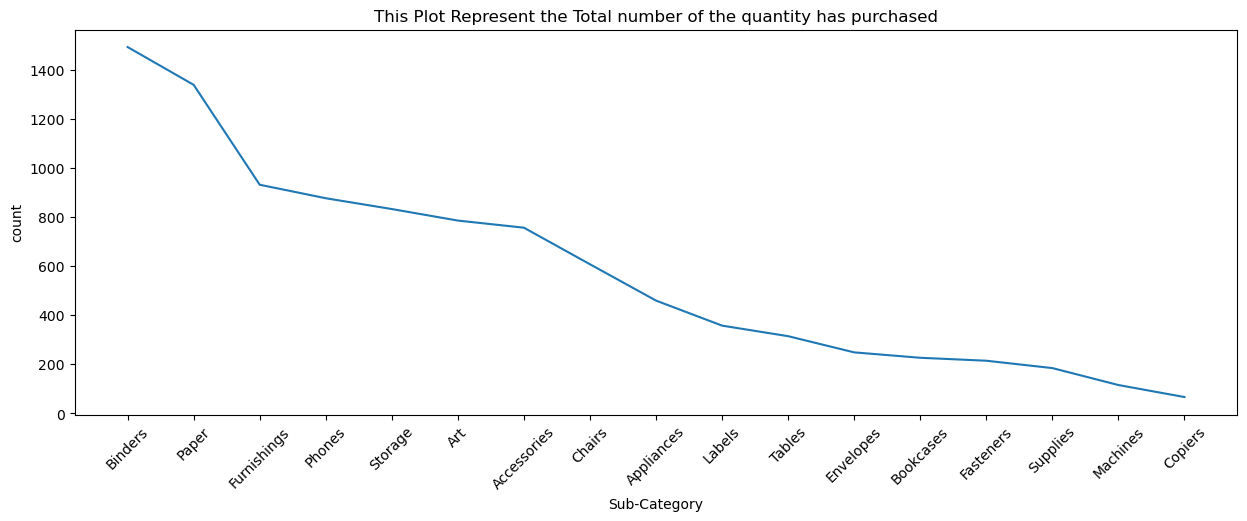

In [30]:
plt.figure(figsize=(15 , 5))
sns.lineplot(df['Sub-Category'].value_counts())
plt.title('This Plot Represent the Total number of the quantity has purchased')
plt.xticks(rotation = 45)
plt.show()

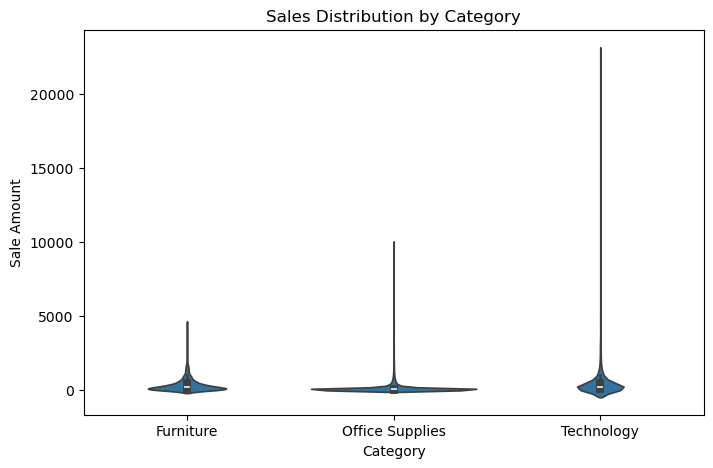

In [31]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Category', y='Sales', data=df)
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sale Amount')
plt.show()

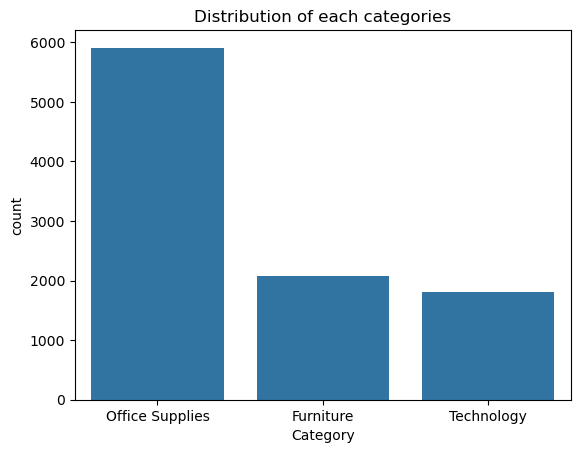

In [32]:
sns.barplot(df['Category'].value_counts())
plt.title('Distribution of each categories')
plt.show()

In [33]:
office_supplies_df = (
    df[df['Category'] == 'Office Supplies']
    .groupby('Sub-Category')['Sales']
    .agg(['sum', 'count']).sort_values(by = 'sum',ascending=False)
)
office_supplies_df

,sum,count
Sub-Category,,
Storage,219343.392,832
Binders,200028.785,1492
Appliances,104618.403,459
Paper,76828.304,1338
Supplies,46420.308,184
Art,26705.410,785
Envelopes,16128.046,248
Labels,12347.726,357
Fasteners,3001.960,214


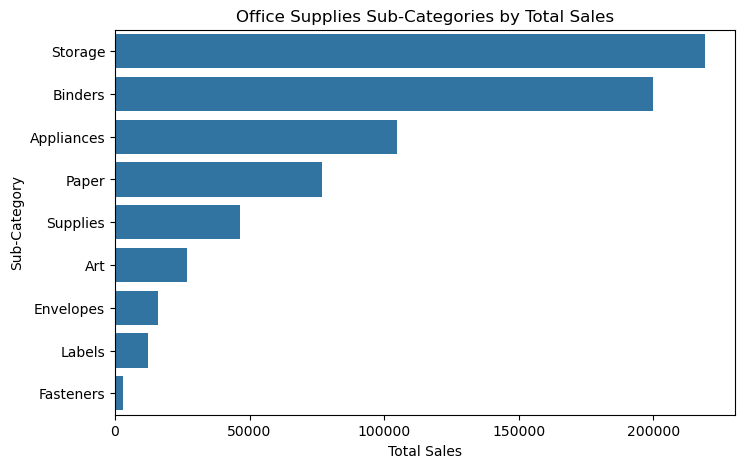

In [34]:
plt.figure(figsize=(8,5))

sns.barplot(
    data=office_supplies_df,
    x='sum',
    y='Sub-Category'
)

plt.title('Office Supplies Sub-Categories by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.show()


In [35]:
## filling missing values 
df['Postal Code'] = df.groupby('City')['Postal Code'] \
    .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))


In [36]:
## Delivery Time

df["Delivery_time"] = (df['Ship Date'] - df['Order Date']).dt.days

## Drop Columns 

In [37]:
# drop columns 
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Ship_day', 'Ship_year', 'Ship_month',
       'order_day', 'order_month', 'order_year', 'order_day_of_week',
       'Ship_day_of_week', 'Delivery_time'],
      dtype='object')

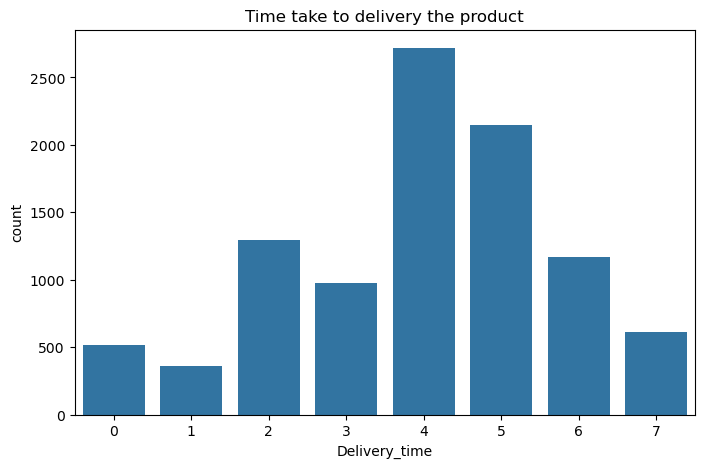

In [38]:
plt.figure(figsize =(8,5))
sns.barplot(df['Delivery_time'].value_counts())
plt.title('Time take to delivery the product')
plt.show()

In [39]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Ship_day', 'Ship_year', 'Ship_month',
       'order_day', 'order_month', 'order_year', 'order_day_of_week',
       'Ship_day_of_week', 'Delivery_time'],
      dtype='object')

In [40]:
df.drop(columns=['Row ID','Order ID','Ship Date','Order Date','Customer ID','Customer Name','Product ID'],inplace = True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship Mode          9800 non-null   object 
 1   Segment            9800 non-null   object 
 2   Country            9800 non-null   object 
 3   City               9800 non-null   object 
 4   State              9800 non-null   object 
 5   Postal Code        9800 non-null   float64
 6   Region             9800 non-null   object 
 7   Category           9800 non-null   object 
 8   Sub-Category       9800 non-null   object 
 9   Product Name       9800 non-null   object 
 10  Sales              9800 non-null   float64
 11  Ship_day           9800 non-null   int32  
 12  Ship_year          9800 non-null   int32  
 13  Ship_month         9800 non-null   int32  
 14  order_day          9800 non-null   int32  
 15  order_month        9800 non-null   int32  
 16  order_year         9800 

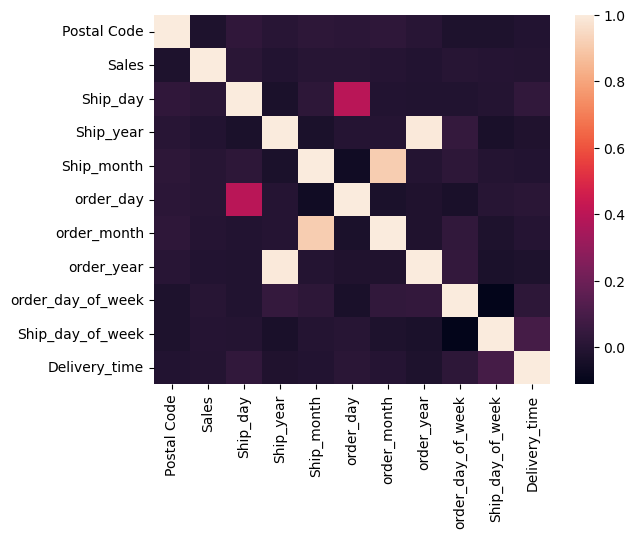

In [42]:
sns.heatmap(df.corr(numeric_only=True))
plt.show()

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge


In [44]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Ship_day', 'Ship_year', 'Ship_month', 'order_day', 'order_month',
       'order_year', 'order_day_of_week', 'Ship_day_of_week', 'Delivery_time'],
      dtype='object')

## Building the pipeline

In [45]:
numeric_features = [
    'Ship_day', 'Ship_month', 'Ship_year',
    'order_day', 'order_month', 'order_year',
    'order_day_of_week', 'Ship_day_of_week', 'Delivery_time','Postal Code'
]

categorical_features = [
    'Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
    'Category', 'Sub-Category','Product Name'
]


In [46]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [47]:
preprocessing =  ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numeric_features),
        ('cate',categorical_transformer,categorical_features)
    ]
)

In [48]:
X = df.drop('Sales',axis = 1)
y= df['Sales']

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


## Ridge Model 

In [50]:
ridge_ml = Pipeline(steps=[
    ('preprocessing',preprocessing),
    ('regressor',Ridge())
    ])

In [51]:
ridge_ml.fit(X_train, y_train)


,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cate', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


##  Ridge Evaluate

In [52]:
from sklearn.metrics import r2_score,mean_absolute_error

ridge_pred = ridge_ml.predict(X_test)

In [53]:
print("R2:", r2_score(y_test, ridge_pred))
print("MAE:", mean_absolute_error(y_test, ridge_pred))

R2: 0.3859257422985827
MAE: 175.42839277580146


## GridSearch - Ridge|

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__alpha':[0.01,0.1,1,10,50,100]
}

grid_ridge = GridSearchCV(ridge_ml, param_grid, cv=5)
grid_ridge.fit(X_train, y_train)

print(grid_ridge.best_params_)

best_ridge = grid_ridge.best_estimator_



{'regressor__alpha': 1}


In [55]:
## Save the model
import joblib

joblib.dump(best_ridge, "best_ridge_model.pkl")

['best_ridge_model.pkl']

## Lesso Model

In [56]:
lasso_ml = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('regressor', Lasso())
])


In [57]:
lasso_ml.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cate', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Evaluate lesso 

In [58]:
lasso_pred = lasso_ml.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error

print("R2 Score:", r2_score(y_test, lasso_pred))
print("MAE:", mean_absolute_error(y_test, lasso_pred))


R2 Score: 0.26135104520964914
MAE: 224.5434966951425


In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__alpha':[0.001,0.01,0.1,1,10]
}

grid_lasso = GridSearchCV(lasso_ml, param_grid, cv=5)
grid_lasso.fit(X_train, y_train)

print(grid_lasso.best_params_)

best_lasso = grid_lasso.best_estimator_


c:\Users\chilesh\miniconda3\envs\newenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.200e+08, tolerance: 1.877e+05
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\chilesh\miniconda3\envs\newenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.160e+08, tolerance: 1.600e+05
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\chilesh\miniconda3\envs\newenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider 

{'regressor__alpha': 0.1}


In [60]:
## Save 

joblib.dump(best_lasso, "best_lasso_model.pkl")

['best_lasso_model.pkl']

In [61]:
ridge_pred = best_ridge.predict(X_test)
lasso_pred = best_lasso.predict(X_test)

from sklearn.metrics import r2_score

print("Ridge R2:", r2_score(y_test, ridge_pred))
print("Lasso R2:", r2_score(y_test, lasso_pred))



Ridge R2: 0.3859257422985827
Lasso R2: 0.33065886005389933
